In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

df_responses columns: Index(['외국인 등록번호', '이름', '성별', '나이', '국적', '거주지', '직업', '한국어 수준', '점수', '결과',
       'OX리스트', '선택답안', '문항코드리스트'],
      dtype='object')
df_questions columns: Index(['문제번호', '문항코드', '평가종류', '배점', '출제단계', '문항유형', '난이도', '평가영역', '평가항목'], dtype='object')
df_irt columns: Index(['문항 번호', '변별도 (alpha)', '난이도 (beta)'], dtype='object')
개인 성적표 - 수험번호: 3490941780
이름: Gulnara
총점: 60.0
백분위: 50.00
영역별 점수:
  어휘: 12
  문법: 18
  쓰기: 8
  읽기: 8
  문화: 14
문항별 상세 분석 리포트
문항 번호: 1
  평가영역: 어휘
  평가항목: 명사
  난이도 (beta): 0.04
  변별도 (alpha): 0.87
  정답률: 0.50

문항 번호: 2
  평가영역: 문법
  평가항목: 명사, 조사
  난이도 (beta): 0.03
  변별도 (alpha): 0.80
  정답률: 0.50

문항 번호: 3
  평가영역: 어휘
  평가항목: 동사
  난이도 (beta): 0.78
  변별도 (alpha): 0.89
  정답률: 0.33

문항 번호: 4
  평가영역: 어휘
  평가항목: 형용사
  난이도 (beta): -0.13
  변별도 (alpha): 0.60
  정답률: 0.53

문항 번호: 5
  평가영역: 어휘
  평가항목: 명사
  난이도 (beta): -0.43
  변별도 (alpha): 0.84
  정답률: 0.60

문항 번호: 6
  평가영역: 어휘
  평가항목: 동사
  난이도 (beta): 0.18
  변별도 (alpha): 0.51
  정답률: 0.47

문항 번호: 7
  평가영역: 어휘
 

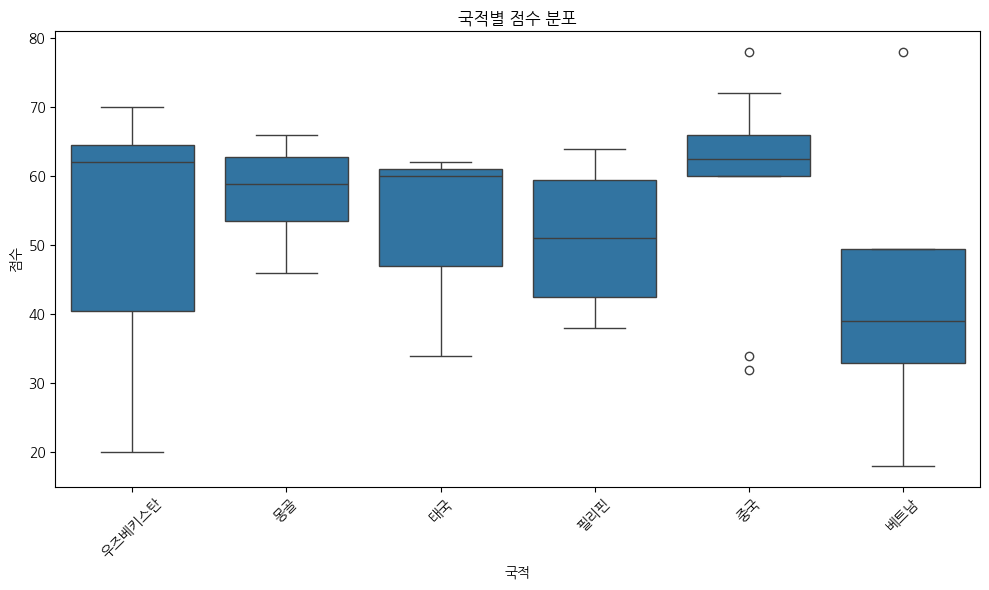

연령대별 성적 분석 리포트
             mean        std   min   max
연령대                                     
10-20대  61.162678  18.784941  18.0  78.0
21-30대  45.666667  10.385888  34.0  60.0
31-40대  52.414550  16.159922  20.0  66.0
41-50대  53.494694  16.578863  34.0  72.0
51대 이상  51.000000  26.870058  32.0  70.0


/tmp/ipykernel_374297/4209659336.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df_responses.groupby('연령대')['점수'].agg(['mean', 'std', 'min', 'max'])


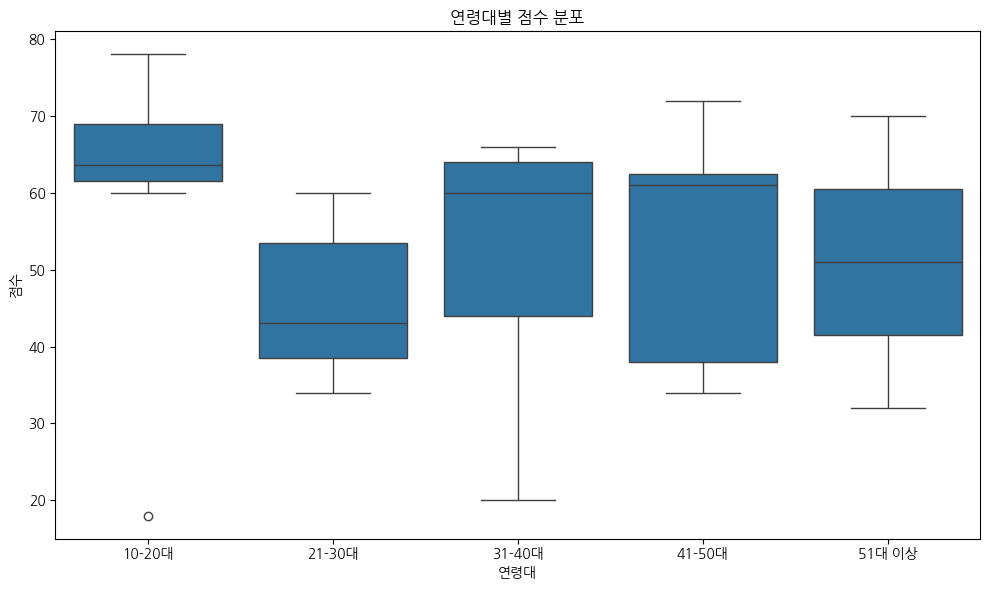

평가 영역별 성적 분석 리포트
             어휘         문법         쓰기         읽기         문화
mean  12.666667  15.733333   4.800000   5.666667  12.066667
std    5.313180   5.501933   2.383854   2.523453   4.912569
min    0.000000   2.000000   0.000000   0.000000   0.000000
max   20.000000  28.000000  10.000000  10.000000  20.000000


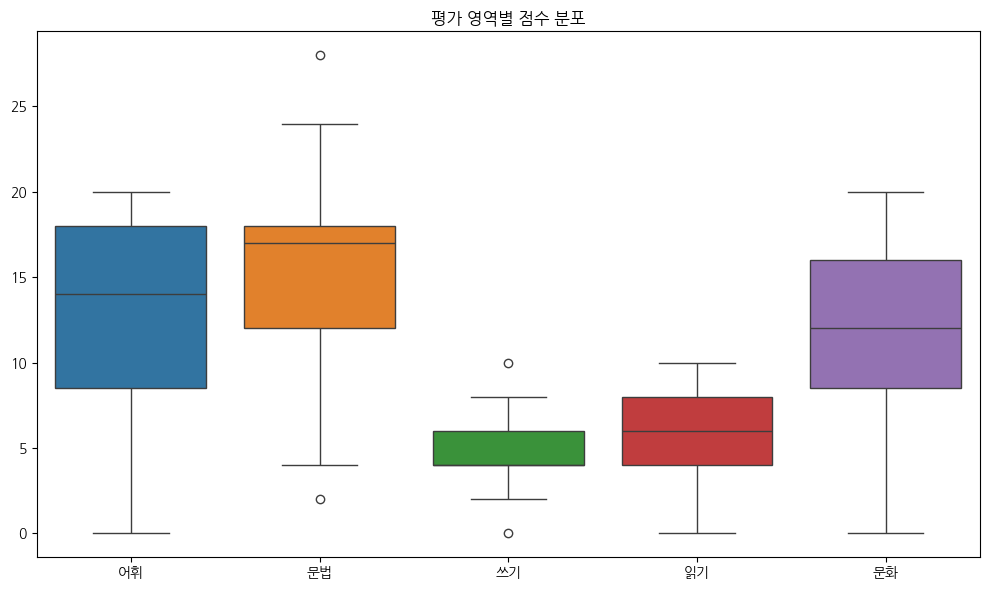

전체 시험 결과 요약 리포트
총 수험자 수: 30
합격률: 56.67%
평균 점수: 53.48
점수 표준편차: 16.38


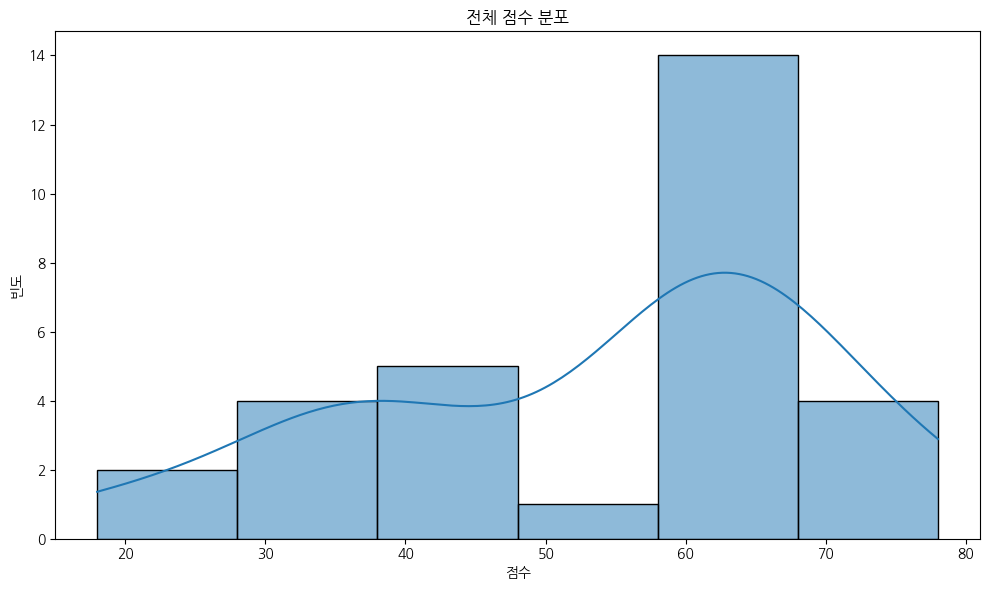

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 데이터 로드
df_questions = pd.read_csv('../exam1.csv')
# 수험자응답정보
df_responses = pd.read_csv('../응답_데이터.csv')
# 문항IRT 분석정보
df_irt = pd.read_csv('../문항_매개변수.csv')
# 수험자 능력정보
df_ability = pd.read_csv('../수험생_능력_추정치.csv')

# 데이터 구조 확인
print("df_responses columns:", df_responses.columns)
print("df_questions columns:", df_questions.columns)
print("df_irt columns:", df_irt.columns)

# 데이터 전처리
df_irt = df_irt.rename(columns={'문항 번호': '문제번호'})
df_merged = pd.merge(df_questions, df_irt, on='문제번호')

# 1. 개인별 성적표 생성 함수
def generate_individual_report(examinee_id):
    examinee_data = df_responses[df_responses['외국인 등록번호'] == examinee_id]
    if examinee_data.empty:
        print(f"수험번호 {examinee_id}에 해당하는 데이터가 없습니다.")
        return
    
    examinee = examinee_data.iloc[0]
    total_score = examinee['점수']
    percentile = stats.percentileofscore(df_responses['점수'], total_score)
    
    # 영역별 점수 계산
    area_scores = {}
    for area in df_questions['평가영역'].unique():
        area_questions = df_questions[df_questions['평가영역'] == area]['문제번호']
        area_ox = [examinee['OX리스트'][i-1] for i in area_questions]
        area_scores[area] = sum([2 if ox == 'O' else 0 for ox in area_ox])  # 모든 문항의 배점을 2점으로 가정
    
    print(f"개인 성적표 - 수험번호: {examinee_id}")
    print(f"이름: {examinee['이름']}")
    print(f"총점: {total_score}")
    print(f"백분위: {percentile:.2f}")
    print("영역별 점수:")
    for area, score in area_scores.items():
        print(f"  {area}: {score}")

# 2. 문항별 상세 분석 리포트 생성 함수
def generate_item_analysis_report():
    print("문항별 상세 분석 리포트")
    for _, row in df_merged.iterrows():
        print(f"문항 번호: {row['문제번호']}")
        print(f"  평가영역: {row['평가영역']}")
        print(f"  평가항목: {row['평가항목']}")
        print(f"  난이도 (beta): {row['난이도 (beta)']:.2f}")
        print(f"  변별도 (alpha): {row['변별도 (alpha)']:.2f}")
        print(f"  정답률: {df_responses['OX리스트'].str[row['문제번호']-1].value_counts(normalize=True).get('O', 0):.2f}")
        print()

# 3. 국적별 성적 분석 리포트 생성 함수
def generate_nationality_report():
    nationality_stats = df_responses.groupby('국적')['점수'].agg(['mean', 'std', 'min', 'max'])
    
    print("국적별 성적 분석 리포트")
    print(nationality_stats)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='국적', y='점수', data=df_responses)
    plt.title('국적별 점수 분포')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. 연령대별 성적 분석 리포트 생성 함수
def generate_age_group_report():
    df_responses['연령대'] = pd.cut(df_responses['나이'], bins=[0, 20, 30, 40, 50, 100], labels=['10-20대', '21-30대', '31-40대', '41-50대', '51대 이상'])
    age_group_stats = df_responses.groupby('연령대')['점수'].agg(['mean', 'std', 'min', 'max'])
    
    print("연령대별 성적 분석 리포트")
    print(age_group_stats)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='연령대', y='점수', data=df_responses)
    plt.title('연령대별 점수 분포')
    plt.tight_layout()
    plt.show()

# 5. 평가 영역별 성적 분석 리포트 생성 함수
def generate_area_report():
    area_scores = {}
    for area in df_questions['평가영역'].unique():
        area_questions = df_questions[df_questions['평가영역'] == area]['문제번호']
        area_ox = df_responses['OX리스트'].apply(lambda x: [x[i-1] for i in area_questions])
        area_scores[area] = area_ox.apply(lambda x: sum([2 if ox == 'O' else 0 for ox in x]))  # 모든 문항의 배점을 2점으로 가정
    
    area_stats = pd.DataFrame(area_scores).agg(['mean', 'std', 'min', 'max'])
    
    print("평가 영역별 성적 분석 리포트")
    print(area_stats)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=pd.DataFrame(area_scores))
    plt.title('평가 영역별 점수 분포')
    plt.tight_layout()
    plt.show()

# 6. 전체 시험 결과 요약 리포트 생성 함수
def generate_summary_report():
    total_examinees = len(df_responses)
    pass_rate = (df_responses['결과'] == 'PASS').mean()
    average_score = df_responses['점수'].mean()
    score_std = df_responses['점수'].std()
    
    print("전체 시험 결과 요약 리포트")
    print(f"총 수험자 수: {total_examinees}")
    print(f"합격률: {pass_rate:.2%}")
    print(f"평균 점수: {average_score:.2f}")
    print(f"점수 표준편차: {score_std:.2f}")
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df_responses['점수'], kde=True)
    plt.title('전체 점수 분포')
    plt.xlabel('점수')
    plt.ylabel('빈도')
    plt.tight_layout()
    plt.show()

# 모든 리포트 생성
sample_examinee_id = df_responses['외국인 등록번호'].iloc[0]
generate_individual_report(sample_examinee_id)
generate_item_analysis_report()
generate_nationality_report()
generate_age_group_report()
generate_area_report()
generate_summary_report()